In [2]:
import numpy as np
import h5py,time, matplotlib.pyplot as plt
from scipy.optimize import fmin_cg, minimize
from drift.core import manager
import corrcal2
import sys
sys.path.insert(0,'/home/zahra/PIPELINE')
from log_red_cal_new import Visibilities_grid, Bls_counts, colour_scatterplot, Scatterplot
from decimal import Decimal
from operator import add,sub
from scipy.optimize import LinearConstraint, BFGS, Bounds
import scipy as sp

ops=(add,sub)


In [3]:
'''
ts_10=h5py.File('/home/zahra/PIPELINE/example_7by7_lmax_mmax_250/draco_synthesis_input_amp_10/maps/tstream_2.h5','r')
ag_10=h5py.File('/home/zahra/PIPELINE/example_7by7_lmax_mmax_250/draco_synthesis_input_amp_10/rand_gains/amp_phase/app_gain_2.h5','r')
rg_10=h5py.File('/home/zahra/PIPELINE/example_7by7_lmax_mmax_250/draco_synthesis_input_amp_10/rand_gains/sig_2.h5','r')
gn_10_50_1=h5py.File('/home/zahra/PIPELINE/example_7by7_lmax_mmax_250/draco_synthesis_input_amp_10/rand_gains/ts_final_50K_1day/app_gain_noise_2.h5','r')


ts_100=h5py.File('/home/zahra/PIPELINE/example_7by7_lmax_mmax_250/draco_synthesis_input_amp_100/maps/tstream_2.h5','r')
ag_100=h5py.File('/home/zahra/PIPELINE/example_7by7_lmax_mmax_250/draco_synthesis_input_amp_100/rand_gains/amp_phase/app_gain_2.h5','r')
rg_100=h5py.File('/home/zahra/PIPELINE/example_7by7_lmax_mmax_250/draco_synthesis_input_amp_100/rand_gains/sig_2.h5','r')
gn_100_50_1=h5py.File('/home/zahra/PIPELINE/example_7by7_lmax_mmax_250/draco_synthesis_input_amp_100/rand_gains/ts_final_50K_1day/app_gain_noise_2.h5','r')


ts_1000=h5py.File('/home/zahra/PIPELINE/example_7by7_lmax_mmax_250/draco_synthesis_input_amp_1000/maps/tstream_2.h5','r')
ag_1000=h5py.File('/home/zahra/PIPELINE/example_7by7_lmax_mmax_250/draco_synthesis_input_amp_1000/rand_gains/amp_phase/app_gain_2.h5','r')
rg_1000=h5py.File('/home/zahra/PIPELINE/example_7by7_lmax_mmax_250/draco_synthesis_input_amp_1000/rand_gains/sig_2.h5','r')
gn_1000_50_1=h5py.File('/home/zahra/PIPELINE/example_7by7_lmax_mmax_250/draco_synthesis_input_amp_1000/rand_gains/ts_final_50K_1day/app_gain_noise_2.h5','r')

ts_10000=h5py.File('/home/zahra/PIPELINE/example_7by7_lmax_mmax_250/draco_synthesis_input_amp_10000/maps/tstream_2.h5','r')
ag_10000=h5py.File('/home/zahra/PIPELINE/example_7by7_lmax_mmax_250/draco_synthesis_input_amp_10000/rand_gains/amp_phase/app_gain_2.h5','r')
rg_10000=h5py.File('/home/zahra/PIPELINE/example_7by7_lmax_mmax_250/draco_synthesis_input_amp_10000/rand_gains/sig_2.h5','r')
gn_10000_50_1=h5py.File('/home/zahra/PIPELINE/example_7by7_lmax_mmax_250/draco_synthesis_input_amp_10000/rand_gains/ts_final_50K_1day/app_gain_noise_2.h5','r')


ts_10_3=h5py.File('/home/zahra/PIPELINE/example_7by7_lmax_mmax_250/draco_synthesis_input_amp_10_sigma_3/maps/tstream_2.h5','r')
ag_10_3=h5py.File('/home/zahra/PIPELINE/example_7by7_lmax_mmax_250/draco_synthesis_input_amp_10_sigma_3/rand_gains/amp_phase/app_gain_2.h5','r')
rg_10_3=h5py.File('/home/zahra/PIPELINE/example_7by7_lmax_mmax_250/draco_synthesis_input_amp_10_sigma_3/rand_gains/sig_2.h5','r')
gn_10_50_1_3=h5py.File('/home/zahra/PIPELINE/example_7by7_lmax_mmax_250/draco_synthesis_input_amp_10_sigma_3/rand_gains/ts_final_50K_1day/app_gain_noise_2.h5','r')

ts_10_5=h5py.File('/home/zahra/PIPELINE/example_7by7_lmax_mmax_250/draco_synthesis_input_amp_10_sigma_5/maps/tstream_2.h5','r')
ag_10_5=h5py.File('/home/zahra/PIPELINE/example_7by7_lmax_mmax_250/draco_synthesis_input_amp_10_sigma_5/rand_gains/amp_phase/app_gain_2.h5','r')
rg_10_5=h5py.File('/home/zahra/PIPELINE/example_7by7_lmax_mmax_250/draco_synthesis_input_amp_10_sigma_5/rand_gains/sig_2.h5','r')
gn_10_50_1_5=h5py.File('/home/zahra/PIPELINE/example_7by7_lmax_mmax_250/draco_synthesis_input_amp_10_sigma_5/rand_gains/ts_final_50K_1day/app_gain_noise_2.h5','r')

'''

ts_2=h5py.File('/home/zahra/PIPELINE/example_3by3_hiraxtrans_lmax_mmax_200/draco_synthesis_nofluc/maps/tstream_2.h5','r')
ag_2=h5py.File('/home/zahra/PIPELINE/example_3by3_hiraxtrans_lmax_mmax_200/draco_synthesis_nofluc/rand_gains/sig_no_fluc/app_gain_2.h5','r')
rg_2=h5py.File('/home/zahra/PIPELINE/example_3by3_hiraxtrans_lmax_mmax_200/draco_synthesis_nofluc/rand_gains/sig_no_fluc2.h5','r')

gn_2=h5py.File('/home/zahra/PIPELINE/example_3by3_hiraxtrans_lmax_mmax_200/draco_synthesis_nofluc/rand_gains/ts_final/app_gain_noise_2.h5','r')


In [4]:
#m=manager.ProductManager.from_config('/home/zahra/PIPELINE/ex_3by3_kl/prod_params_custom.yaml')
#m=manager.ProductManager.from_config('/home/zahra/PIPELINE/example_7by7_lmax_mmax_250/prod_params_custom.yaml')
#m=manager.ProductManager.from_config('/home/zahra/PIPELINE/ex_7by7_hex/prod_params_custom.yaml')

m = manager.ProductManager.from_config('/home/zahra/PIPELINE/example_3by3_hiraxtrans_lmax_mmax_200/prod_params_custom.yaml')

#Scatterplot(m)

t=m.telescope
x=t.feedpositions[:,0] #these are x and y positions not x and y polarizations
y=t.feedpositions[:,1]


#klobj=m.kltransforms['kl']

time_channel=400
Ndish=9
correlation_arr,sum_counts,corr_counts=Bls_counts(m)

Nbls,_=correlation_arr.shape


time_arr=np.arange(325,335,1)



def Vis_arr_real(Nbls,time_arr):
    vis_arr=np.zeros((Nbls,time_arr.size))
    for i in range(Nbls):
        for j in range(len(time_arr)):
            int_time_arr=np.int(time_arr[j])
            vis_arr[np.int(i),np.int(j)]=arr[2][i,int_time_arr].real
    return np.mean(vis_arr,axis=1)



def Vis_arr_imag(Nbls,time_arr):
    vis_arr=np.zeros((Nbls,time_arr.size))
    for i in range(Nbls):
        for j in range(len(time_arr)):
            int_time_arr=np.int(time_arr[j])
            vis_arr[np.int(i),np.int(j)]=arr[2][i,int_time_arr].imag
    return np.mean(vis_arr,axis=1)


v1=np.zeros(2*Nbls)
v1[0::2]=1
v2=np.zeros(2*Nbls)
v2[1::2]=1
vecs=1.e3*np.vstack([v1,v2])


lims=sum_counts
#lims=np.append(lims,lims)
#diag=sigma**2*np.ones(72)/1000


src=np.zeros(2*Nbls)
#src=1000*v1

ant1=correlation_arr[:,0].astype(int)
ant2=correlation_arr[:,1].astype(int)

#random_10_5=np.random.normal(0,1.5,2*Ndish)
#np.save('random_10_5',random_10_5)

Product directory: /home/zahra/PIPELINE/example_3by3_hiraxtrans_lmax_mmax_200/bt_matrices


In [5]:

runs=1

'''
random_10=np.load('random_10.npy')
random_100=np.load('random_100.npy')
random_1000=np.load('random_1000.npy')
random_10000=np.load('random_10000.npy')
random_10_3=np.load('random_10_3.npy')
random_10_5=np.load('random_10_5.npy')
'''
#random_10=np.random.normal(0,1.,2*Ndish)
#random_100=np.random.normal(0,10.,2*Ndish)
#random_1000=np.random.normal(0,100.,2*Ndish)
#random_10000=np.random.normal(0,1000.,2*Ndish)

random_pt1=np.load('random_pt1.npy')

def fit_gains(m,file_no_gain,gain, file_with_gain,file_gain_noise, time_channel,Tsys,ndays,random):
    gg=np.zeros((runs,Ndish*2))
    for run in range(runs):
        arr=Visibilities_grid(m,file_no_gain,gain,file_with_gain,file_gain_noise,time_channel,Tsys,ndays)
        vis=arr[2][:,time_channel]
        sigma=arr[-1]
        diag=sigma**2*np.ones(2*Nbls)
        print (sigma)
        mat=corrcal2.sparse_2level(diag,vecs,src,2*lims) #init
        
        gain=gain['gain'][0,:Ndish,time_channel]
        sim_gains=np.append(gain.real,gain.imag)
        sim_gains=np.zeros(Ndish*2)
        sim_gains[0::2]=gain.real
        sim_gains[1::2]=gain.imag
        sim_gains_amp=sim_gains[0::2]
        sim_gains_phase=sim_gains[1::2]
         
        mult=random+1.

        gvec=np.array([])
        for i in range(len(sim_gains)):
            gvec=np.append(gvec,sim_gains[i]+random[i])
            #gvec=np.append(gvec,sim_gains[i]*mult[i])


        data=np.zeros(2*vis.size)
        data[0::2]=vis.real
        data[1::2]=vis.imag
        fac=1.;
        normfac=1.
        asdf=fmin_cg(corrcal2.get_chisq,gvec*fac,corrcal2.get_gradient,(data,mat,ant1,ant2,fac,normfac))
        #asdf=fmin_cg(corrcal2.get_chisq_dense,gvec*fac,corrcal2.get_gradient_dense,(data,diag_mat,vecs_mat,ant1,ant2,fac,normfac))
        fit_gains_run=asdf/fac
        gg[run,:]=fit_gains_run
        
        gain_std=(np.std(gg,axis=0)/np.sqrt(runs)).flatten()
        gain_mean=np.mean(gg,axis=0).flatten() #shape is 98, we take every second one for amp so shape is 49
        rec_gains_amp=gain_mean[0::2]
        rec_gains_phase=gain_mean[1::2]
        gain_std_amp=gain_std[0::2]
        gain_std_phase=gain_std[1::2]

    return rec_gains_amp, sim_gains_amp
    
    
rec_gains_amp_2, sim_gains_amp_2=fit_gains(m,ts_2,rg_2,ag_2, gn_2,time_channel,50,1,random_pt1)

'''
gg_10,sim_gains_amp_10=fit_gains(m,ts_10,rg_10,ag_10, gn_10_50_1,time_channel,50,1,random_10)

gg_10_3,sim_gains_amp_10_3=fit_gains(m,ts_10_3,rg_10_3,ag_10_3, gn_10_50_1_3,time_channel,50,1,random_10_3)

gg_10_5,sim_gains_amp_10_5=fit_gains(m,ts_10_5,rg_10_5,ag_10_5, gn_10_50_1_5,time_channel,50,1,random_10_5)

gg_100, sim_gains_amp_100=fit_gains(m,ts_100,rg_100,ag_100, gn_100_50_1,time_channel,50,1,random_100)

gg_1000, sim_gains_amp_1000=fit_gains(m,ts_1000,rg_1000,ag_1000, gn_1000_50_1,time_channel,50,1,random_1000)

gg_10000, sim_gains_amp_10000=fit_gains(m,ts_10000,rg_10000,ag_10000, gn_10000_50_1,time_channel,50,1,random_10000)
'''
              


(0.012207031977595827, 'sigma_gn')
0.012207031977595827
         Current function value: 246664.696095
         Iterations: 446
         Function evaluations: 1009
         Gradient evaluations: 1000


'\ngg_10,sim_gains_amp_10=fit_gains(m,ts_10,rg_10,ag_10, gn_10_50_1,time_channel,50,1,random_10)\n\ngg_10_3,sim_gains_amp_10_3=fit_gains(m,ts_10_3,rg_10_3,ag_10_3, gn_10_50_1_3,time_channel,50,1,random_10_3)\n\ngg_10_5,sim_gains_amp_10_5=fit_gains(m,ts_10_5,rg_10_5,ag_10_5, gn_10_50_1_5,time_channel,50,1,random_10_5)\n\ngg_100, sim_gains_amp_100=fit_gains(m,ts_100,rg_100,ag_100, gn_100_50_1,time_channel,50,1,random_100)\n\ngg_1000, sim_gains_amp_1000=fit_gains(m,ts_1000,rg_1000,ag_1000, gn_1000_50_1,time_channel,50,1,random_1000)\n\ngg_10000, sim_gains_amp_10000=fit_gains(m,ts_10000,rg_10000,ag_10000, gn_10000_50_1,time_channel,50,1,random_10000)\n'

In [6]:
def rel_err(rec_gains_amp,sim_gains_amp):
    rel_err_amp=np.abs(rec_gains_amp-sim_gains_amp)/sim_gains_amp

    rel_err_amp_mean=np.mean(rel_err_amp)
    rel_err_amp_std=np.std(rel_err_amp,ddof=1)
    return rec_gains_amp, rel_err_amp, rel_err_amp_mean, rel_err_amp_std

rel_err_2=rel_err(rec_gains_amp_2,sim_gains_amp_2)

    
'''
rel_err_10=rel_err(gg_10,sim_gains_amp_10)
rel_err_10_3=rel_err(gg_10_3,sim_gains_amp_10_3)
rel_err_10_5=rel_err(gg_10_5,sim_gains_amp_10_5)


rel_err_100=rel_err(gg_100,sim_gains_amp_100)
rel_err_1000=rel_err(gg_1000,sim_gains_amp_1000)
rel_err_10000=rel_err(gg_10000,sim_gains_amp_10000)

print (rel_err_10_3[2])
'''

'\nrel_err_10=rel_err(gg_10,sim_gains_amp_10)\nrel_err_10_3=rel_err(gg_10_3,sim_gains_amp_10_3)\nrel_err_10_5=rel_err(gg_10_5,sim_gains_amp_10_5)\n\n\nrel_err_100=rel_err(gg_100,sim_gains_amp_100)\nrel_err_1000=rel_err(gg_1000,sim_gains_amp_1000)\nrel_err_10000=rel_err(gg_10000,sim_gains_amp_10000)\n\nprint (rel_err_10_3[2])\n'

In [7]:
rec_gains_amp_2, sim_gains_amp_2

(array([0.99943877, 1.00967275, 1.0060225 , 1.0039309 , 1.01151034,
        1.00413472, 1.00576681, 1.00978897, 0.99978964]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1.]))

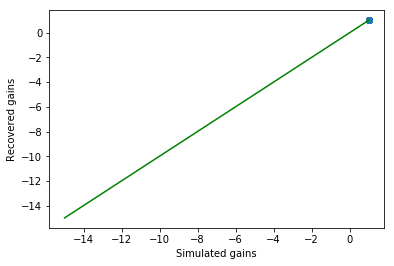

In [9]:
fig, ax = plt.subplots()

lims = [-15,  # min of both axes
    np.max([ax.get_xlim()]),  # max of both axes
]
ax.scatter(rec_gains_amp_2,sim_gains_amp_2)
ax.plot(lims, lims,'g')
#plt.errorbar(x_true_real[:Ndish,time_channel],x_rec_real[:Ndish,time_channel],xerr=None,yerr=error[:Ndish],linestyle="None")
plt.xlabel('Simulated gains')
plt.ylabel('Recovered gains')
lim=.002

[0.06023433 0.13220328 0.34759464]
[0.05176634 0.21032598 1.05472074]


'\nplt.plot(rel_err_10[0])\nplt.plot(rel_err_100[0])\nplt.plot(rel_err_1000[0])\nplt.plot(rel_err_10000[0])\n'

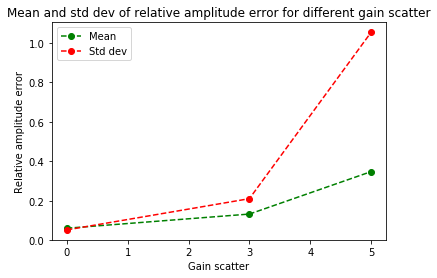

In [69]:
rel_err_4input_gains_mean=np.array([rel_err_10[1],rel_err_10_3[1],rel_err_10_5[1]])
rel_err_4input_gains_std=np.array([rel_err_10[2],rel_err_10_3[2],rel_err_10_5[2]])

gain_input_arr=np.array([0,3,5])

print (rel_err_4input_gains_mean)
print (rel_err_4input_gains_std)
#plt.plot(rel_err_4input_gains,'o')
#plt.show()

plt.plot(gain_input_arr,rel_err_4input_gains_mean,'g',linestyle='--',marker='o')
plt.plot(gain_input_arr,rel_err_4input_gains_std,'r',linestyle='--',marker='o')
plt.xlabel('Gain scatter')
plt.ylabel('Relative amplitude error')
plt.legend(('Mean','Std dev'))
plt.title('Mean and std dev of relative amplitude error for different gain scatter')
#plt.savefig('Mean_and_stddev_relative_amp_error_gainfluc_10_diff_gain_scatter')
'''
plt.plot(rel_err_10[0])
plt.plot(rel_err_100[0])
plt.plot(rel_err_1000[0])
plt.plot(rel_err_10000[0])
'''

In [6]:


print (gvec[0::2]-gain_mean[0::2],'diff gvec and gain fit')



print (gain_std,'gain std')
print (rec_gains_amp.min(),rec_gains_amp.max(), 'gain mean amp max and min')
print (rec_gains_phase.min(),rec_gains_phase.max(), 'gain mean phase max and min')

#print (rel_err,'rel err')
#print (rel_err_1_run,'rel err 1 run')
#print (rel_err_1_run.min(),rel_err_1_run.max(), 'rel err max and min 1 run')

print (gain_mean,'gain mean')
print (np.mean(rec_gains_amp),'mean of amp')
print (np.std(rec_gains_amp),'std of amp')

#sim_gains_amp=sim_gains[:Ndish]
#rec_gains_amp=gain_mean[:Ndish]
#sim_gains_phase=sim_gains[Ndish:]
#rec_gains_phase=gain_mean[Ndish:]
#gain_std_amp=gain_std[:Ndish]
#gain_std_phase=gain_std[Ndish:]

#np.save('3by3_gain_mean_1e5_runs_signal_1000_redundant_gainfluc_1e-6_gain_input_1e-7_scalefac_1',gain_mean)
#np.save('7by7_gain_std_sig_1e-2_runs_1_signal_1000_redundant_gainfluc_1e-6_gain_input_1e-5_times_gainfluc',gain_std)
#colors=['#E49B0F','#007F66','#6082B6','#AB92B3','#00AB66','#A57C00','#D4AF37','#FFD700','#E6BE8A','#85754E','#996515','#A8E4A0','#00FF00','#1CAC78','#008000','#66B032','#1164B4','#2887C8','#A99A86','#2a3439','#5218FA','#E9D66B','#FF7A00','#DF73FF','#F400A1','#006DB0','#49796B','#71A6D2','#319177','#ED2939','#B2EC5D','#4B0082','#FF4F00','#BA160C','#B3446C','#F08080','#FFA07A','#B0C4DE','#AE98AA','#C19A6B','#9F4576','#AAF0D1','#F653A6','#D0417E','#FF0090','#FDBE02','#FF8243','#880085','#915F6D','#0A7E8C','#FEBAAD','#0A7E8C','#997A8D','#AD4379']


#colour_scatterplot(m,rel_err)

'''
fig, ax = plt.subplots()

lims = [-1.5,  # min of both axes
    1+np.max([ax.get_xlim()]),  # max of both axes
]
ax.scatter(sim_gains_amp,rec_gains_amp)#,c=colors[:Ndish])
plt.errorbar(sim_gains_amp,rec_gains_amp,xerr=None,yerr=gain_std_amp,linestyle="None")

ax.plot(lims, lims,'g')
#plt.errorbar(x_sim[:Ndish,time_channel],x_rec[:Ndish,time_channel],xerr=None,yerr=error_single[:Ndish],linestyle="None")
plt.xlabel('Simulated gain amplitude')
plt.ylabel('Recovered gain amplitude')
#plt.ylim(.95,1.05)
#plt.xlim(.95,1.05)

plt.show()



gain_mean_0=gain_mean[0]
chisq_0=corrcal2.get_chisq(gain_mean,*args)
print (gain_mean,'gain mean')

args=(data,mat,ant1,ant2)


gain_arr=np.linspace(.8,1.3,100.)

corrcal_arr=np.array([])
for i in gain_arr:
    print (i)
    gain_mean[0]=i
    corrcal_sing=corrcal2.get_chisq(gain_mean,*args)
    corrcal_arr=np.append(corrcal_arr,corrcal_sing)


plt.plot(gain_arr,corrcal_arr)
plt.plot(gain_mean_0,chisq_0,'o')
plt.xlabel('gain amplitude')
plt.ylabel(r'$\rm{\chi^2}$')
plt.show()
#gain_mean_sig_pt01=np.load('7by7_gain_mean_sig_1e-2_runs_1_signal_1000_redundant_gainfluc_1e-6_gain_input_1e-7_scalefac_1.npy')
#gain_std_sig_pt01=np.load('7by7_gain_std_sig_1e-2_runs_1000_signal_1000_redundant_gainfluc_1e-6_gain_input_1e-5_times_gainfluc.npy')
#print (gvec.flatten()[0::2],'sim gains with fluctuation')
#print (fit_gains.flatten()[0::2],'fit gains')

#gain_mean_1_run=np.load('3by3_gain_mean_1_run_signal_1000_redundant_gainfluc_1e-6_gain_input_1e-7_scalefac_1.npy')
'''


NameError: name 'gvec' is not defined

In [ ]:
gg_amp=gg[:,0::2]
gg_amp_mean=np.mean(gg_amp,axis=1) #shape is number of runs
gg_amp_std=np.std(gg_amp,axis=1)

plt.hist(gg_amp_std,'auto',color='g')
plt.xlabel('Standard deviation')
plt.show()

cent_dish_hex_amp=38
corner_dish_hex_amp=0

cent_dish_sq_amp=24 #16,17,18,30,31,32,23,25
corner_dish_sq_amp=0 #6,42,48

def hist_indiv_dishes_amp(cent_dish,corner_dish):
    gg_dish_cent_amp=gg_amp[:,cent_dish]
    gg_dish_corner_amp=gg_amp[:,corner_dish]

    rel_err_dish_corner_amp=np.abs(gg_dish_corner_amp-sim_gains_amp[corner_dish])/sim_gains_amp[corner_dish]
    rel_err_dish_cent_amp=np.abs(gg_dish_cent_amp-sim_gains[cent_dish])/sim_gains[cent_dish]

    plt.hist(rel_err_dish_corner_amp,'auto',color='g')
    plt.hist(rel_err_dish_cent_amp,'auto',color='r')
    plt.legend(('Outer','Centre'))
    plt.xlabel('Relative error')
    plt.show()

hist_indiv_dishes_amp(cent_dish_sq_amp,corner_dish_sq_amp)


In [ ]:
gain_mean_0=gain_mean[0]
chisq_0=corrcal2.get_chisq(gain_mean,*args)
print (gain_mean,'gain mean')

args=(data,mat,ant1,ant2)


gain_arr=np.linspace(.8,1.3,100.)

corrcal_arr=np.array([])
for i in gain_arr:
    print (i)
    gain_mean[0]=i
    corrcal_sing=corrcal2.get_chisq(gain_mean,*args)
    corrcal_arr=np.append(corrcal_arr,corrcal_sing)


plt.plot(gain_arr,corrcal_arr)
plt.plot(gain_mean_0,chisq_0,'o')
plt.xlabel('gain amplitude')
plt.ylabel(r'$\rm{\chi^2}$')
plt.show()

In [52]:
import numpy
import corrcal2
from matplotlib import pyplot as plt

nn=2
x=numpy.arange(nn)
xmat=numpy.repeat([x],nn,axis=0)
ymat=xmat.copy().transpose()
print xmat, 'xmat'
print ymat, 'ymat'

[[0 1]
 [0 1]] xmat
[[0 0]
 [1 1]] ymat


In [53]:
scat=0.01

xmat=xmat+scat*numpy.random.randn(xmat.shape[0],xmat.shape[1])
ymat=ymat+scat*numpy.random.randn(ymat.shape[0],ymat.shape[1])
print xmat, 'xmat'
print ymat, 'ymat'

[[-0.00839213  1.0149532 ]
 [ 0.00761254  0.99414329]] xmat
[[0.01364164 0.01004008]
 [0.99910909 0.99378085]] ymat


In [54]:
xpos=np.ndarray.flatten(xmat)
ypos=np.ndarray.flatten(ymat)
print xpos
print ypos

[-0.00839213  1.0149532   0.00761254  0.99414329]
[0.01364164 0.01004008 0.99910909 0.99378085]


In [55]:
xx,yy=np.meshgrid(xpos,ypos)
print xx
print yy

[[-0.00839213  1.0149532   0.00761254  0.99414329]
 [-0.00839213  1.0149532   0.00761254  0.99414329]
 [-0.00839213  1.0149532   0.00761254  0.99414329]
 [-0.00839213  1.0149532   0.00761254  0.99414329]]
[[0.01364164 0.01364164 0.01364164 0.01364164]
 [0.01004008 0.01004008 0.01004008 0.01004008]
 [0.99910909 0.99910909 0.99910909 0.99910909]
 [0.99378085 0.99378085 0.99378085 0.99378085]]


In [56]:
antvec=numpy.arange(xpos.size)
ant1,ant2=np.meshgrid(antvec,antvec)
print ant1
print ant2

[[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]
[[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]]


In [57]:
umat=xx-xx.transpose()
vmat=yy-yy.transpose()
print umat
print vmat

[[ 0.          1.02334533  0.01600467  1.00253542]
 [-1.02334533  0.         -1.00734066 -0.02080991]
 [-0.01600467  1.00734066  0.          0.98653075]
 [-1.00253542  0.02080991 -0.98653075  0.        ]]
[[ 0.          0.00360156 -0.98546745 -0.98013922]
 [-0.00360156  0.         -0.989069   -0.98374077]
 [ 0.98546745  0.989069    0.          0.00532823]
 [ 0.98013922  0.98374077 -0.00532823  0.        ]]


In [58]:
isok=numpy.where(ant2>ant1)
print isok
ant1_org=ant1[isok]
ant2_org=ant2[isok]
print ant1_org
print ant2_org

(array([1, 2, 2, 3, 3, 3]), array([0, 0, 1, 0, 1, 2]))
[0 0 1 0 1 2]
[1 2 2 3 3 3]


In [59]:
u_org.shape

(6,)

In [60]:
print asdf

[991.75758585 -25.85386083 991.74538208 -26.03082072 991.92688726
 -25.66271797 991.66549275 -25.95332612]


In [65]:

vis_org=numpy.random.randn(ant1_org.size)+numpy.complex(0,1)*numpy.random.randn(ant1_org.size)

noise_org=numpy.ones(ant1_org.size)

vis,noise,ant1,ant2,edges=vis_org,noise_org,ant1_org,ant2_org, edges
v1=numpy.zeros(2*vis.size)
v1[0::2]=1
v2=numpy.zeros(2*vis.size)
v2[1::2]=1
vecs=numpy.vstack([v1,v2])
src=v1*10

big_noise=numpy.zeros(2*noise.size)
big_noise[0::2]=noise
big_noise[1::2]=noise

big_vis=numpy.zeros(2*vis.size)
big_vis[0::2]=numpy.real(vis)
big_vis[1::2]=numpy.imag(vis)

mycov=corrcal2.sparse_2level(big_noise,100*vecs,500*src,2*edges)
guess=numpy.zeros(2*len(ant1))
guess[0::2]=1.0
fac=1000.0
from scipy.optimize import fmin_cg
gvec=numpy.zeros(2*ant1.max()+2)
gvec[0::2]=1.0
gvec=gvec+0.1*numpy.random.randn(gvec.size)
gvec[0]=1
gvec[1]=0

asdf_2=fmin_cg(corrcal2.get_chisq,gvec*fac,corrcal2.get_gradient,(big_vis+500*src,mycov,ant1,ant2,fac))


IndexError: index 6 is out of bounds for axis 1 with size 6

In [ ]:
print asdf_2